In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers

In [2]:
df = pd.read_csv("spectral_functions.csv")

In [3]:
df.head()

,754.3,740.2,726.7,713.9,701.7,690,678.9,668.2,658,648.2,...,339.3,338.3,337.3,336.3,335.4,334.4,333.5,332.5,331.6,Id
0,0.15,0.50,0.92,1.58,2.71,4.03,5.42,6.67,7.66,8.29,...,-0.11,0.00,0.00,-0.01,0.04,0.10,0.13,0.01,-0.03,DFBSJ142114.64+425823.6
1,0.15,0.37,1.11,2.54,4.54,7.08,10.33,13.98,16.99,17.65,...,0.11,0.19,0.19,0.18,0.06,0.09,0.20,0.15,-0.01,DFBSJ142122.01+425921.3
2,2.06,2.36,2.48,2.40,2.06,1.83,2.01,2.32,2.38,2.28,...,-0.05,0.05,0.10,0.05,-0.05,-0.10,-0.08,-0.04,0.06,DFBSJ142125.68+425138.2
3,-0.05,0.11,0.52,1.08,1.80,2.50,3.31,4.63,5.95,5.94,...,0.39,0.20,0.10,0.27,0.45,0.34,0.19,0.21,0.21,DFBSJ142126.80+425301.4
4,0.13,0.09,0.01,0.09,0.24,0.31,0.35,0.36,0.47,0.53,...,-0.10,0.01,0.10,0.01,-0.25,-0.32,-0.11,0.11,0.19,DFBSJ142141.43+430014.5


In [4]:
df = df.drop(["Id"], axis = 1)

In [5]:
X = df.values

In [6]:
X

array([[ 0.15,  0.5 ,  0.92, ...,  0.13,  0.01, -0.03],
       [ 0.15,  0.37,  1.11, ...,  0.2 ,  0.15, -0.01],
       [ 2.06,  2.36,  2.48, ..., -0.08, -0.04,  0.06],
       ...,
       [ 0.09,  0.14,  0.36, ...,  0.01, -0.03, -0.05],
       [ 0.8 ,  0.83,  0.92, ..., -0.01,  0.02,  0.03],
       [ 0.2 ,  0.39,  0.9 , ...,  1.23,  1.24,  1.37]])

In [7]:
X.shape

(1008, 117)

In [8]:
for i in range(len(X)):
    arr = X[i]
    arr=(arr-arr.min())/(arr.max()-arr.min())
    X[i] = arr

In [11]:
x_train = X[0: 800:]
x_test = X[800: 1008:]

x_train.shape
x_test.shape

(208, 117)

In [62]:
inpu_dim = 117
encoding_dim = 8

In [108]:
input_vect = Input(shape = (inpu_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_vect)
decoded = Dense(inpu_dim)(encoded)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [111]:
adam = optimizers.Adam()

In [112]:
autoencoder.compile(optimizer=adadelta, loss = "MSE",metrics=['mean_squared_error'])

In [113]:
history = autoencoder.fit(x_train, x_train, epochs = 2000, batch_size = 128, shuffle=True, validation_data=(x_test, x_test))

Train on 800 samples, validate on 208 samples
Epoch 1/2000
800/800 [==============================] - 1s 2ms/step - loss: 0.1721 - mean_squared_error: 0.1721 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
Epoch 2/2000
800/800 [==============================] - 0s 18us/step - loss: 0.1579 - mean_squared_error: 0.1579 - val_loss: 0.1464 - val_mean_squared_error: 0.1464
Epoch 3/2000
800/800 [==============================] - 0s 24us/step - loss: 0.1484 - mean_squared_error: 0.1484 - val_loss: 0.1363 - val_mean_squared_error: 0.1363
Epoch 4/2000
800/800 [==============================] - 0s 24us/step - loss: 0.1376 - mean_squared_error: 0.1376 - val_loss: 0.1248 - val_mean_squared_error: 0.1248
Epoch 5/2000
800/800 [==============================] - 0s 25us/step - loss: 0.1250 - mean_squared_error: 0.1250 - val_loss: 0.1119 - val_mean_squared_error: 0.1119
Epoch 6/2000
800/800 [==============================] - 0s 25us/step - loss: 0.1110 - mean_squared_error: 0.1110 - val_loss: 0.098

800/800 [==============================] - 0s 20us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 51/2000
800/800 [==============================] - 0s 19us/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 52/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 53/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 54/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 55/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 56/2000
800/

800/800 [==============================] - 0s 18us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 100/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 101/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 102/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 103/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 104/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 105/200

800/800 [==============================] - 0s 16us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 149/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 150/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 151/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 152/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 153/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 154/200

800/800 [==============================] - 0s 17us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 198/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 199/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 200/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 201/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 202/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 203/200

800/800 [==============================] - 0s 17us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 247/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 248/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 249/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 250/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 251/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 252/200

800/800 [==============================] - 0s 17us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 296/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 297/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 298/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 299/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 300/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 301/200

800/800 [==============================] - 0s 17us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 345/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 346/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 347/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 348/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 349/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 350/200

800/800 [==============================] - 0s 17us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 394/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 395/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 396/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 397/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 398/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 399/200

800/800 [==============================] - 0s 19us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 443/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 444/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 445/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 446/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 447/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 448/200

800/800 [==============================] - 0s 16us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 492/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 493/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 494/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 495/2000
800/800 [==============================] - 0s 19us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 496/2000
800/800 [==============================] - 0s 20us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 497/200

800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 541/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 542/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 543/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 544/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 545/2000
800/800 [==============================] - 0s 15us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 546/200

800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 590/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 591/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 592/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 593/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 594/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 595/200

800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 639/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 640/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 641/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 642/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 643/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 644/200

800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 688/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 689/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 690/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 691/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 692/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 693/200

800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 737/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 738/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 739/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 740/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 741/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 742/200

800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 786/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 787/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 788/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 789/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 790/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 791/200

800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 835/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 836/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 837/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 838/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 839/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 840/200

800/800 [==============================] - 0s 19us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 884/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 885/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 886/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 887/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 888/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 889/200

800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 933/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 934/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 935/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 936/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 937/2000
800/800 [==============================] - 0s 21us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 938/200

800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 982/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 983/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 984/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 985/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 986/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 987/200

Epoch 1030/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1031/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1032/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1033/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 1034/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1035/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error:

Epoch 1079/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1080/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1081/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1082/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1083/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1084/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1128/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1129/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1130/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1131/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1132/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1133/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1177/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1178/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1179/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1180/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1181/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1182/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error:

Epoch 1226/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1227/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1228/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1229/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1230/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1231/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1275/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1276/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1277/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1278/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 1279/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1280/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0067 - val_mean_squared_error:

Epoch 1324/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1325/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1326/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1327/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1328/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1329/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1373/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1374/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1375/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1376/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1377/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1378/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1422/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1423/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1424/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1425/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1426/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1427/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1471/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1472/2000
800/800 [==============================] - 0s 19us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1473/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1474/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1475/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1476/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1520/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1521/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1522/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1523/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1524/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1525/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1569/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1570/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1571/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1572/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1573/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1574/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error:

Epoch 1618/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1619/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1620/2000
800/800 [==============================] - 0s 19us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1621/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1622/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1623/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1667/2000
800/800 [==============================] - 0s 19us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1668/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1669/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1670/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1671/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1672/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1716/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1717/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1718/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1719/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1720/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1721/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1765/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1766/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 1767/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 1768/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1769/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1770/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1814/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1815/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1816/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1817/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1818/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1819/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1863/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1864/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 1865/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1866/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1867/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1868/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1912/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1913/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1914/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1915/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1916/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1917/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error:

Epoch 1961/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1962/2000
800/800 [==============================] - 0s 16us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 1963/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1964/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1965/2000
800/800 [==============================] - 0s 18us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 1966/2000
800/800 [==============================] - 0s 17us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0070 - val_mean_squared_error:

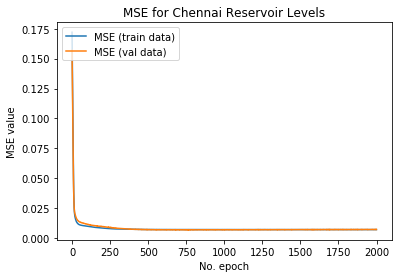

In [114]:
plt.plot(history.history['mean_squared_error'], label='MSE (train data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()



In [115]:
encoded_values = encoder.predict(x_test)
decoded_values = decoder.predict(encoded_values)

In [116]:
encoded_values.shape

(208, 8)

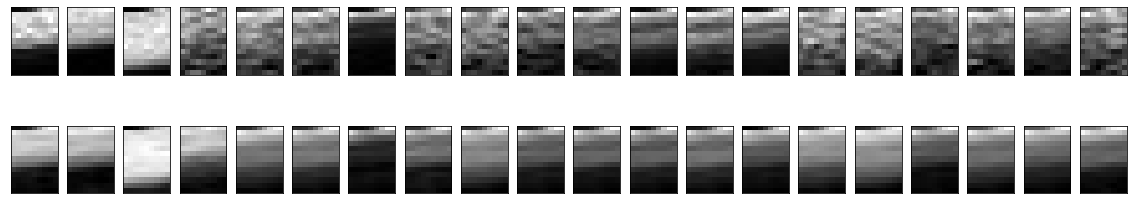

In [117]:
n = 20
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_values[i].reshape(13,9))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [90]:
x_train[x_train < 0]

array([], dtype=float64)